In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.layers import Conv2D, Dropout, MaxPooling2D, Flatten, Dense
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

2025-05-14 17:14:00.150251: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747242840.361267      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747242840.419790      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [3]:
train_images.shape

(60000, 28, 28)

# Visualizing train and test images

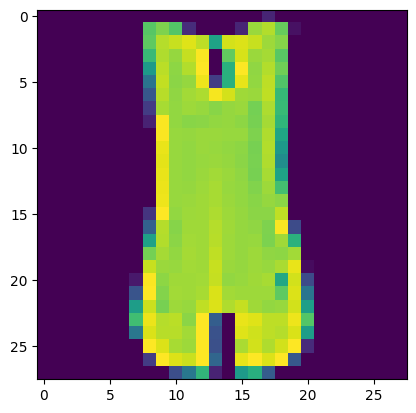

In [4]:
plt.imshow(train_images[4])

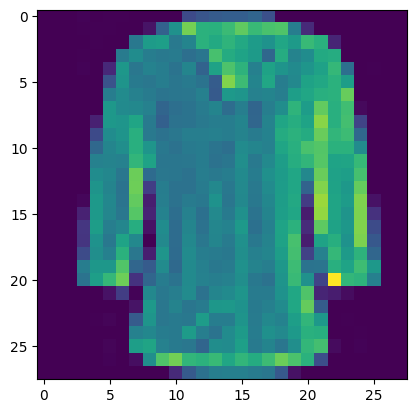

In [5]:
plt.imshow(test_images[4])

In [6]:
test_images[4]

array([[  0,   0,   0,   2,   0,   1,   1,   0,   0,   0,   0,  57,  67,
         73,  76,  76,  83,  62,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   1,   1,   0,   0,  13,  79, 128, 201, 162,
        161, 173, 192, 172, 181, 184, 108,  30,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   1,   0,   0, 102, 139, 142, 103, 115, 162,
        154, 165, 153, 139, 129, 150, 138, 171, 161,  26,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0, 106, 124, 108, 103, 106,  93, 100,
        180, 156, 147, 138,  85, 157, 114, 124, 154, 157,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   2,   0,  29, 134, 101, 113, 108,  97, 116,  81,
        146, 183, 164, 111, 146, 131, 122, 132, 145, 169,  93,   0,   1,
          0,   0],
       [  0,   0,   0,   0,   0,  65, 131, 105, 101, 108, 100, 104,  97,
         74, 206, 174, 115, 150, 108, 119, 146, 152, 162, 141,   0,   0,
          0,   0],
       [  

In [7]:
test_labels[4]

6

# Reshaping

In [8]:
train_images = train_images.astype("float32") /255
test_images = test_images.astype("float32") /255


In [9]:
train_images = train_images.reshape(train_images.shape[0],28,28,1)
test_images = test_images.reshape(test_images.shape[0],28,28,1)


In [10]:
train_labels = tf.keras.utils.to_categorical(train_labels, 10)
test_labels = tf.keras.utils.to_categorical(test_labels, 10)


# Model

In [11]:
model = tf.keras.Sequential()
model.add(Conv2D(filters=64, kernel_size = 2, padding = "same", activation = "relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Conv2D(filters=32, kernel_size = 2, padding = "same", activation = "relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1747242855.067226      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 13942 MB memory:  -> device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5
I0000 00:00:1747242855.067906      35 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 13942 MB memory:  -> device: 1, name: Tesla T4, pci bus id: 0000:00:05.0, compute capability: 7.5


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 28, 28, 64)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 14, 14, 32)          │           8,224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 32)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1568)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │         401,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 412,778 (1.57 MB)

 Trainable params: 412,778 (1.57 MB)

 Non-trainable params: 0 (0.00 B)

# Compiling and training

In [12]:
model.compile(loss="categorical_crossentropy",
             optimizer= "rmsprop",
             metrics= ["accuracy"]
             )

In [13]:
model.fit(train_images, train_labels, batch_size=64, epochs=10)

Epoch 1/10


I0000 00:00:1747242858.237839      97 service.cc:148] XLA service 0x781e04001ce0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747242858.238372      97 service.cc:156]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1747242858.238391      97 service.cc:156]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5
I0000 00:00:1747242858.474431      97 cuda_dnn.cc:529] Loaded cuDNN version 90300


 47/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.3865 - loss: 1.6767

I0000 00:00:1747242861.773083      97 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.7113 - loss: 0.7823
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8525 - loss: 0.4094
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8684 - loss: 0.3630
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8782 - loss: 0.3375
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8825 - loss: 0.3224
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8884 - loss: 0.3135
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8897 - loss: 0.3081
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8928 - loss: 0.2996
Epoch 9/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8941 - loss: 0.2979
Epoch 10/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8964 - loss: 0.2902


# Testing

In [16]:
model.evaluate(test_images, test_labels, verbose=0)

[0.3092131018638611, 0.9024999737739563]

# Now we'll manipulate images

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

In [ ]:
io.imread()